In [ ]:
# var urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
# var hiddenElement = document.createElement('a');
# hiddenElement.href = 'data:text/csv;charset=utf-8,' + encodeURI(urls.join('\n'));
# hiddenElement.target = '_blank';
# hiddenElement.download = 'myFile.txt';
# hiddenElement.click();

In [1]:
from pathlib import Path
from fastai import *
from fastai.vision import *

In [2]:
folder = 'black'
file = 'urls_black.txt'

In [5]:
folder = 'teddys'
file = 'urls_teddys.txt'

In [8]:
folder = 'grizzly'
file = 'urls_grizzly.txt'

In [9]:
path = Path('/home/f1n4lsh4r3/Documents/fastai')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [10]:
download_images(path/file, dest, max_pics=200)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [11]:
classes = ['teddys', 'grizzly', 'black']

In [12]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

teddys


grizzly


black


In [13]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [14]:
data.classes

['black', 'grizzly', 'teddys']

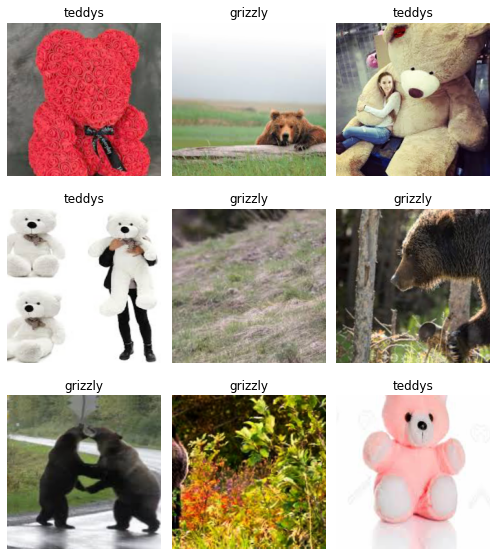

In [15]:
data.show_batch(rows=3, figsize=(7,8))

In [16]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 384, 96)

In [17]:
learn = create_cnn(data, models.resnet18, metrics=error_rate)

In [18]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.859327,0.023205,0.000000,01:03


In [19]:
learn.save('stage-1')

In [20]:
learn.unfreeze()

In [1]:
learn.lr_find()

NameError: name 'learn' is not defined

In [2]:
learn.recorder.plot()

NameError: name 'learn' is not defined

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

In [ ]:
learn.save('stage-2')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
from fastai.widgets import *

losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

In [ ]:
fd = FileDeleter(file_paths=top_loss_paths)

In [ ]:
data.classes